<a href="https://colab.research.google.com/github/prashantRmishra/Tensorflow_learnings/blob/master/image_prediction_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


lets format the train and test images and labels

we are using 2d images instead of flattened 1d array og 784 values ,so format may be 1,28,28 or 28,28,1 where 1 is for gray scale images or it could have been 3 for rgb.

In [0]:
from keras import backend as K


In [0]:
if K.image_data_format()=='channels_first':
  train_image=mnist_train_images.reshape(mnist_train_images.shape[0],1,28,28)
  test_image=mnist_test_images.reshape(mnist_test_images.shape[0],1,28,28)
  input_shape=(1,28,28)
else:
  train_image=mnist_train_images.reshape(mnist_train_images.shape[0],28,28,1)
  test_image=mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1)
  input_shape=(28,28,1)

train_image=train_image.astype('float32')
test_image=test_image.astype('float32')
train_image/=255
test_image/=255
  

we have to modify labels as well in 1d array of 10 pixels

In [0]:
train_label=keras.utils.to_categorical(mnist_train_labels,10)
test_label=keras.utils.to_categorical(mnist_test_labels,10)

lets define functions to prind and visualize our data in 2d 

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


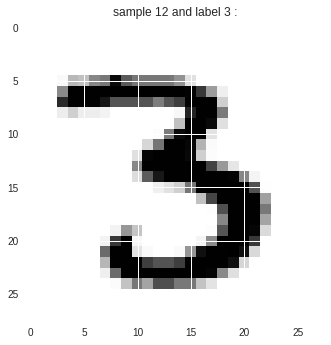

In [0]:
import matplotlib.pyplot as plt

def display_function(num):
  print(train_label[num])
  label=train_label[num].argmax(axis=0)
  image=train_image[num].reshape(28,28)
  plt.title('sample %d and label %d :' %(num,label))
  plt.imshow(image)
  plt.show()
  
display_function(12)  

here comes the hot part of creating our cnn.
hers we feed 32 window input of kernel size 3x3 in 1st layer of perseptron then in second hidden layer we feed 64 window with kernel size 3x3 then again in 3rd hidden layer we reduce the size of kernel to 2x2 for reducing the data size and focusing on more imp details. We add droupout layer to avoid overfitting then we flatten out input to 128 pixel 1d array which is then passed through final hiddel layer to give output to final 10 neurons which gives the label for evaluating the model.

In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(66,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.22))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.22))
model.add(Dense(10,activation='softmax'))


lets compile our model

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

now lets fit data to our model

In [0]:
history=model.fit(train_image,train_label,batch_size=32,epochs=10,verbose=2,validation_data=(test_image,test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 197s - loss: 0.1301 - acc: 0.9602 - val_loss: 0.0467 - val_acc: 0.9850
Epoch 2/10
 - 193s - loss: 0.0575 - acc: 0.9829 - val_loss: 0.0367 - val_acc: 0.9863
Epoch 3/10
 - 199s - loss: 0.0490 - acc: 0.9859 - val_loss: 0.0370 - val_acc: 0.9882
Epoch 4/10
 - 202s - loss: 0.0438 - acc: 0.9871 - val_loss: 0.0759 - val_acc: 0.9816
Epoch 5/10
 - 201s - loss: 0.0435 - acc: 0.9871 - val_loss: 0.0362 - val_acc: 0.9898
Epoch 6/10
 - 192s - loss: 0.0434 - acc: 0.9872 - val_loss: 0.0467 - val_acc: 0.9867
Epoch 7/10
 - 192s - loss: 0.0444 - acc: 0.9875 - val_loss: 0.0517 - val_acc: 0.9861
Epoch 8/10
 - 201s - loss: 0.0464 - acc: 0.9872 - val_loss: 0.0442 - val_acc: 0.9880
Epoch 9/10
 - 206s - loss: 0.0494 - acc: 0.9873 - val_loss: 0.0432 - val_acc: 0.9879
Epoch 10/10
 - 201s - loss: 0.0475 - acc: 0.9871 - val_loss: 0.0537 - val_acc: 0.9877


In [0]:
score=model.evaluate(test_image,test_label,verbose=0)

In [0]:
print('loss: ',(score[0]))
print('accuracy: ',(score[1]))

loss:  0.053672468895225846
accuracy:  0.9877
